<a href="https://colab.research.google.com/github/yujinchu04/test_repository/blob/main/%EC%B6%94%EC%9C%A0%EC%A7%84_2021%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99%EA%B3%BC%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%88%98%ED%96%89%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2021 데이터과학과 머신러닝 수행평가
* Direction : wineClass 데이터는 레드와인과 화이트와인, 그리고 와인질을 평가하는 데이터 셋이다.
* 파일명은 wineClass.csv이다. 
* 다음을 딥러닝 모델로 학습시켜 가장 높은 정확도를 산출하시오.
* 각 열의 이름은 다음과 같다.
* 결합산,휘발산,구연산,잔여설탕,염화물,자유아황산가스,총황화합물,밀도,산성도,황화합물,알콜,와인질,와인종류
* 이미 완성된 코드의 경우 수정하지 않고, 결과를 도출한다.

# 데이터 파일 불러오기

In [ ]:
import os
import random
from matplotlib import pyplot as plt
 
# URL로 다운받은 파일 사용하기
from urllib.request import urlretrieve
urlretrieve("https://drive.google.com/uc?export=download&id=1rCT8Q3nHXpxA13qaSkGvnklG5gJmXxzM", "wineClass.csv")
###

('wineClass.csv', <http.client.HTTPMessage at 0x7ff07f9649d0>)

#라이브러리 가져오기

In [ ]:
import pandas as pd

# 데이터 셋 불러오기

In [ ]:
df=pd.read_csv('wineClass.csv',encoding='cp949')

# 데이터 보기

In [ ]:
# 처음 5줄을 봅니다.
print(df.head(50))

In [ ]:
# 데이터의 전반적인 정보를 확인해 봅니다.
print(df.info())

In [ ]:
# 각 정보별 특징을 좀더 자세히 출력합니다.
print(df.describe())

#모델 설계

## 라이브러리 불러오기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
import tensorflow as tf

## 데이터 로드

여러 번 로드하면서 모델 정확도 검증 가능(아마두)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.utils import np_utils # for one hot encoding
 
dataset=df.values
X = dataset[:,0:12] #사용 X
Y = dataset[:,12] #와인 종류 분류용
 
X0=X[:,0:11] #와인질 전까지만
#print(X0)
Yx=dataset[:,11] #와인질 분류
Y0=pd.get_dummies(Yx) # one hot encoding, 
  #데이터 파일에 품질 1, 2가 없어서 제대로 된 인코딩이라고 할 수는 없음.
Y0=Y0.values
#print(Y0)
''' 
Y_all=dataset[:,11:] #통합된 정확도 측정을 위해서임.
x_a_train,x_a_test,y_a_train,y_a_test=train_test_split(X0,Y_all,test_size=0.3)
 
yall=pd.get_dummies(y_a_train[:,0]) # 12번 콜럼에 대해서는 원 핫 인코딩 need
y_a_train_r=yall.values 
print(y_a_train_r) #찐 훈련용
yall0=pd.get_dummies(y_a_test[:,0])
y_a_test_r=yall0.values 
print(y_a_test_r) #찐 검증용
 '''
 
 
x_train,x_test,y_train,y_test=train_test_split(X0,Y,test_size=0.2) #와인 분류용
x0_train,x0_test,y0_train,y0_test=train_test_split(X0,Y0,test_size=0.2) #와인질 분류용
#print(x_test)
#print(y0_test)

print(x_test)

[[ 6.8   0.22  0.35 ...  3.24  0.42  9.  ]
 [ 6.8   0.73  0.2  ...  3.12  0.28 11.1 ]
 [ 7.5   0.61  0.26 ...  3.3   0.53  9.8 ]
 ...
 [ 6.7   0.42  0.39 ...  3.31  0.58  9.7 ]
 [ 6.8   0.44  0.37 ...  3.08  0.65 10.5 ]
 [ 6.8   0.56  0.03 ...  3.44  0.63 10.  ]]


## 모델 설정

####와인 분류 모델

In [ ]:
MODEL_PATH='./model/'
if not os.path.exists(MODEL_PATH):
  os.mkdir(MODEL_PATH)
model_path=MODEL_PATH+'{val_loss:.4f}-{val_accuracy:.4f}-{epoch:02d}.hdf5' ####최고 성능 모델 저장

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=2,save_best_only=True) ###222

In [ ]:
model = Sequential() # 4층에, 노드 복잡하지 않게. 이진분류임
model.add(Dense(20, input_dim=11, activation='relu')) 
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

####와인 질 모델

In [ ]:
MODEL_PATH0='./model0/'
if not os.path.exists(MODEL_PATH0):
  os.mkdir(MODEL_PATH0)
model_path0=MODEL_PATH0+'{val_loss:.4f}-{val_accuracy:.4f}-{epoch:02d}.hdf5' ####최고 성능 모델 저장

In [ ]:
#from keras.callbacks import ModelCheckpoint
checkpointer0=ModelCheckpoint(filepath=model_path0, monitor='val_loss', verbose=2,save_best_only=True) ###222

In [ ]:
from keras.metrics import categorical_accuracy
from keras.layers import Flatten

In [ ]:
model0 = Sequential() #4층 60 30 20 10 정도로 돌릴 때 가장 좋았음. (최고 모델이, 아마도)
model0.add(Dense(30, input_dim=11, activation='relu')) 
model0.add(Flatten()) #아래 링크 참고함.
#http://5.9.10.113/65240824/keras-valueerror-shapes-none-1-and-none-48-48-96-are-incompatible
model0.add(Dense(20, activation='relu')) 
model0.add(Dense(10, activation='relu')) 
model0.add(Dense(10, activation='relu'))
model0.add(Dense(7, activation='softmax'))

## 모델 컴파일

In [ ]:
model.compile(loss='binary_crossentropy', #와인 분류
             optimizer="adam", 
             metrics=['accuracy'])

In [ ]:
model0.compile(optimizer='adam', #와인질 분류
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습시키기

In [ ]:
'''model.fit(x_train, y_train, epochs=10, batch_size=200, #와인 종류
          validation_split=0.2, verbose=0, callbacks=[checkpointer])'''

wineseries = model.fit(x_train, y_train, epochs=1000, batch_size=100, #와인 종류
          validation_split=0.3, verbose=1, callbacks=[checkpointer])

Epoch 1/1000
37/37 [==============================] - 1s 10ms/step - loss: 0.4739 - accuracy: 0.7573 - val_loss: 0.3585 - val_accuracy: 0.7551

Epoch 00001: val_loss improved from 0.55666 to 0.35849, saving model to ./model/0.3585-0.7551-01.hdf5
Epoch 2/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.3545 - accuracy: 0.7775 - val_loss: 0.3126 - val_accuracy: 0.8551

Epoch 00002: val_loss improved from 0.35849 to 0.31258, saving model to ./model/0.3126-0.8551-02.hdf5
Epoch 3/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8782 - val_loss: 0.2006 - val_accuracy: 0.9308

Epoch 00003: val_loss improved from 0.31258 to 0.20063, saving model to ./model/0.2006-0.9308-03.hdf5
Epoch 4/1000
37/37 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9335 - val_loss: 0.1972 - val_accuracy: 0.9295

Epoch 00004: val_loss improved from 0.20063 to 0.19716, saving model to ./model/0.1972-0.9295-04.hdf5
Epoch 5/1000
37/37 

In [ ]:
'''model0.fit(x0_train, y0_train, epochs=100, batch_size=200, #와인질
          validation_split=0.2, verbose=0, callbacks=[checkpointer0])
'''
wineclass = model0.fit(x0_train, y0_train, epochs=1000, batch_size=100, #와인질
         validation_split=0.3, verbose=1, callbacks=[checkpointer0])

Epoch 1/1000
37/37 [==============================] - 90s 11ms/step - loss: 15.2826 - accuracy: 0.1748 - val_loss: 2.1652 - val_accuracy: 0.2244

Epoch 00001: val_loss improved from inf to 2.16515, saving model to ./model0/2.1652-0.2244-01.hdf5
Epoch 2/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.8500 - accuracy: 0.2498 - val_loss: 1.3843 - val_accuracy: 0.4128

Epoch 00002: val_loss improved from 2.16515 to 1.38434, saving model to ./model0/1.3843-0.4128-02.hdf5
Epoch 3/1000
37/37 [==============================] - 0s 3ms/step - loss: 1.4137 - accuracy: 0.3839 - val_loss: 1.3055 - val_accuracy: 0.3981

Epoch 00003: val_loss improved from 1.38434 to 1.30550, saving model to ./model0/1.3055-0.3981-03.hdf5
Epoch 4/1000
37/37 [==============================] - 0s 2ms/step - loss: 1.3541 - accuracy: 0.3867 - val_loss: 1.2940 - val_accuracy: 0.4256

Epoch 00004: val_loss improved from 1.30550 to 1.29398, saving model to ./model0/1.2940-0.4256-04.hdf5
Epoch 5/1000
37/3

## 결과 출력

In [ ]:
from keras.models import load_model

####와인 종류

In [ ]:
print("\n Test Accuracy: %.4f\n" % (model.evaluate(x_test, y_test)[1])) # 와인 종류에 대한 검사
print("\n Accuracy: %.4f" % (model.evaluate(x_train,y_train)[1]))

41/41 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 0.9869

 Test Accuracy: 0.9869

163/163 [==============================] - 0s 1ms/step - loss: 0.0315 - accuracy: 0.9906

 Accuracy: 0.9906


In [ ]:
bestm=load_model('/content/model/와인종류.0.0306-0.9904-957.hdf5') #현재 학습에서 고른 모델
#bestm=load_model('/content/model/0.0319-0.9891-788.hdf5') # 9851 9877
print("\n Test Accuracy: %.4f\n" % (bestm.evaluate(x_test, y_test)[1])) # 와인 종류에 대한 검사
print("\n Accuracy: %.4f" % (bestm.evaluate(x_train,y_train)[1]))

41/41 [==============================] - 0s 967us/step - loss: 0.0438 - accuracy: 0.9877

 Test Accuracy: 0.9877

163/163 [==============================] - 0s 969us/step - loss: 0.0327 - accuracy: 0.9906

 Accuracy: 0.9906


In [ ]:
b_bestm=load_model('/content/와인분류0.0539-0.9846-220.hdf5') #이전 학습에서 고른 모델 -> before_best_model
#bestm=load_model('/content/model/0.0725-453.hdf5') # 9851 9877
print("\n Test Accuracy: %.4f\n" % (b_bestm.evaluate(x_test, y_test)[1])) # 와인 종류에 대한 검사
print("\n Accuracy: %.4f" % (b_bestm.evaluate(x_train,y_train)[1]))

41/41 [==============================] - 0s 1ms/step - loss: 0.0706 - accuracy: 0.9800

 Test Accuracy: 0.9800

163/163 [==============================] - 0s 961us/step - loss: 0.0530 - accuracy: 0.9863

 Accuracy: 0.9863


####와인 품질

In [ ]:
print("\n Test Accuracy: %.4f\n" % (model0.evaluate(x0_test, y0_test)[1])) #와인 
print("\n Accuracy: %.4f" % (model0.evaluate(x0_train, y0_train)[1]))

41/41 [==============================] - 0s 963us/step - loss: 1.0737 - accuracy: 0.5462

 Test Accuracy: 0.5462

163/163 [==============================] - 0s 1ms/step - loss: 1.0092 - accuracy: 0.5696

 Accuracy: 0.5696


In [ ]:
bestm0=load_model('/content/model0/와인질.1.0504-0.5423-215.hdf5')  
print("\n Test Accuracy: %.4f\n" % (bestm0.evaluate(x0_test, y0_test)[1])) #와인 
print("\n Accuracy: %.4f" % (bestm0.evaluate(x0_train, y0_train)[1]))

41/41 [==============================] - 0s 929us/step - loss: 1.0462 - accuracy: 0.5562

 Test Accuracy: 0.5562

163/163 [==============================] - 0s 998us/step - loss: 1.0548 - accuracy: 0.5434

 Accuracy: 0.5434


In [ ]:
b_bestm0=load_model('/content/와인질1.0693-0.5297-397.hdf5') #이전 학습에서 높은 정확도 보인 모델, 테스트 셋에서 점수가 더 잘 나옴
print("\n Test Accuracy: %.4f\n" % (b_bestm0.evaluate(x0_test, y0_test)[1])) #와인 
print("\n Accuracy: %.4f" % (b_bestm0.evaluate(x0_train, y0_train)[1]))

41/41 [==============================] - 0s 1ms/step - loss: 1.0049 - accuracy: 0.5708

 Test Accuracy: 0.5708

163/163 [==============================] - 0s 1ms/step - loss: 1.0395 - accuracy: 0.5597

 Accuracy: 0.5597


모델 불러오기 부분

In [ ]:
from keras.models import load_model
model123=model0
model123.evaluate(x_a_test,y_a_test_r)
wine12=load_model('/content/model_trash/94-1.1253.hdf5')
#wine12.evaluate(x_a_test,y_a_test_r)

###시각화

val_loss가 train_loss와 차이가 날 때(높아질 떄) 과적합이 시작됐다 판단

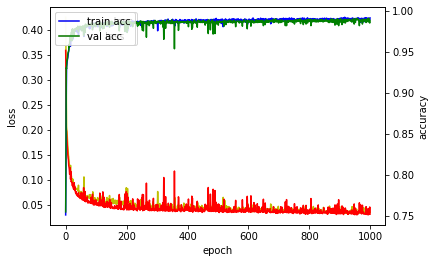

<Figure size 1440x1080 with 0 Axes>

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(wineseries.history['loss'], 'y', label='train loss')
loss_ax.plot(wineseries.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(wineseries.history['accuracy'], 'b', label='train acc')
acc_ax.plot(wineseries.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.figure(figsize=(20,15))
plt.show()

#쭉 같이 내려가는 모습 -> 과적합 판단 모르겠음

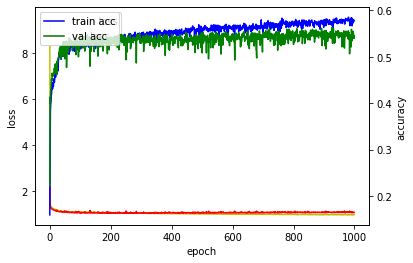

<Figure size 1440x1080 with 0 Axes>

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(wineclass.history['loss'], 'y', label='train loss')
loss_ax.plot(wineclass.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(wineclass.history['accuracy'], 'b', label='train acc')
acc_ax.plot(wineclass.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.figure(figsize=(20,15))
plt.show()

#200 근처에서 선택, -> train acc & val acc

파일 삭제(하고 위에서 다시 생성할 것)

In [ ]:
import shutil

shutil.rmtree('/content/model')
shutil.rmtree('/content/model0')

In [ ]:
##############################################모델 병합###################################################  일단은 X

In [ ]:
https://jaehyeongan.github.io/2019/03/26/KERAS-FUNCTIONAL-API-MULTI-INPUT-%EB%AA%A8%EB%8D%B8-%EA%B5%AC%EC%B6%95%ED%95%98%EA%B8%B0/